Import lib.

In [1]:
import os
import pandas as pd
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn import preprocessing
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
# from sklearn.datasets import load_files
# sys.path.append('..') 
# import helpers.data_mining_helpers as dmh

# import nltk
# nltk.download('punkt')
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# from sklearn.preprocessing import binarize
# from sklearn.metrics.pairwise import cosine_similarity



Data input.

In [2]:
train_file_path = '..\\training.csv'
test_file_path = '..\\public_processed.csv'
df = pd.read_csv(train_file_path)
testing_df = pd.read_csv(test_file_path)


df.shape : (8688526, 26)  |||  test_df.shape : (600182, 25)

In [3]:
training_df = df.copy()
test_df = testing_df.copy()
# print(df.shape)
# print(test_df.shape)

# Rename the columns to match the previous code
# df.columns = ['txkey', 'locdt', 'loctm', 'chid', 'cano', 'locdt']
# test_df.columns = ['sentence', 'score', 'provider']

# Combine the two dataframes
# X = test_df
# display(test_df.head())
# display(df.head())
# Randomly select 3000 rows and drop duplicates and missing values
# X = X.sample(n=3000, random_state=42, replace=False)
# X.dropna(inplace=True)
# X.drop_duplicates(inplace=True)
# display(X)


label_encoder_chid = LabelEncoder()
label_encoder_cano = LabelEncoder()
label_encoder_mchno = LabelEncoder()
label_encoder_acqic = LabelEncoder()
label_encoder_etymd = LabelEncoder()
label_encoder_mcc = LabelEncoder()
label_encoder_stocn = LabelEncoder()
label_encoder_scity = LabelEncoder()
label_encoder_stscd = LabelEncoder()
label_encoder_hcefg = LabelEncoder()
label_encoder_csmcu = LabelEncoder()

training_df['chid'] = label_encoder_chid.fit_transform(training_df['chid'])
training_df['cano'] = label_encoder_cano.fit_transform(training_df['cano'])
training_df['mchno'] = label_encoder_mchno.fit_transform(training_df['mchno'])
training_df['acqic'] = label_encoder_acqic.fit_transform(training_df['acqic'])
training_df['etymd']= label_encoder_etymd.fit_transform(training_df['etymd'])
training_df['mcc']= label_encoder_mcc.fit_transform(training_df['mcc'])
training_df['stocn']= label_encoder_stocn.fit_transform(training_df['stocn'])
training_df['scity']= label_encoder_scity.fit_transform(training_df['scity'])
training_df['stscd']= label_encoder_stscd.fit_transform(training_df['stscd'])
training_df['hcefg']= label_encoder_hcefg.fit_transform(training_df['hcefg'])
training_df['csmcu']= label_encoder_csmcu.fit_transform(training_df['csmcu'])

# ##test
# test_df['chid'] = label_encoder.fit_transform(test_df['chid'])
# test_df['cano'] = label_encoder.fit_transform(test_df['cano'])
# test_df['mchno'] = label_encoder.fit_transform(test_df['mchno'])
# test_df['acqic'] = label_encoder.fit_transform(test_df['acqic'])
# test_df['etymd']= label_encoder.fit_transform(test_df['etymd'])
# test_df['mcc']= label_encoder.fit_transform(test_df['mcc'])
# test_df['stocn']= label_encoder.fit_transform(test_df['stocn'])
# test_df['scity']= label_encoder.fit_transform(test_df['scity'])
# test_df['stscd']= label_encoder.fit_transform(test_df['stscd'])
# test_df['hcefg']= label_encoder.fit_transform(test_df['hcefg'])
# test_df['csmcu']= label_encoder.fit_transform(test_df['csmcu'])


In [4]:
display(test_df['csmcu'].head())
display(testing_df['csmcu'].head())

0    70.0
1    70.0
2     NaN
3    70.0
4    68.0
Name: csmcu, dtype: float64

0    70.0
1    70.0
2     NaN
3    70.0
4    68.0
Name: csmcu, dtype: float64

Data preprocess.

type:  
type0 : txkeys     
type1 (times) : locdt loctm        
type2 (money) : conam flam1 ovrlt csmcu csmam      
type3 (person) : chid cano     
type4 (places) : mchno stocn scity     
type5 (other trade types) : contp etymd acqic mcc ecfg insfg iterm bnsfg stscd flbmk hcefg flg_3dsmk       


In [5]:




fraud_df = training_df[df['label'] == 1]
non_fraud_df = training_df[df['label'] == 0]
# print(fraud_df.shape)
# print(non_fraud_df.shape)
# print(training_df.shape)


In [21]:
# each feature should use ifts own label encoder so that the unseen value can be handled
# try:
#     print(label_encoder.transform([-1]))
# except ValueError:
#     print("unseen value")


unseen value


In [6]:
training_df.drop(['txkey'], axis=1, inplace=True)

col: locdt
max ratio top 10: [0.00994199406113997, 0.005308064592765556, 0.0052041373216559685, 0.005078077957528802, 0.0050596267404475525, 0.0050282632232695, 0.0048465658532442875, 0.004786257092331747, 0.004742863715401113, 0.004707029163550903]


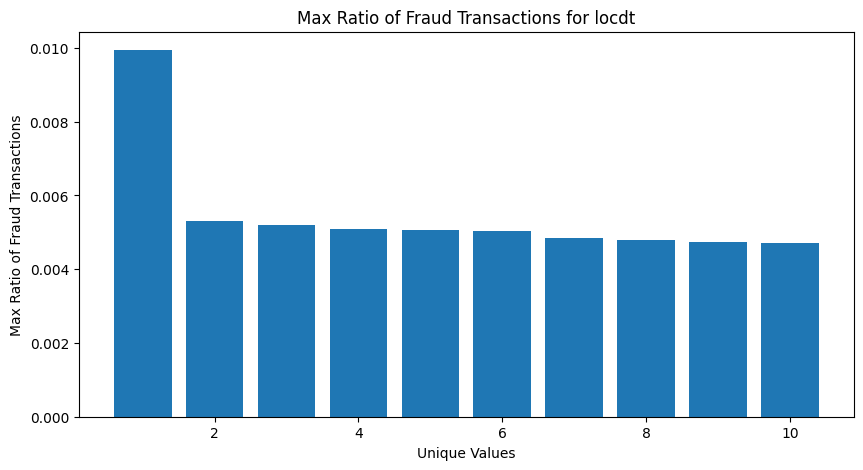

min ratio top 10: [0.0026486522640626047, 0.0026311775472849298, 0.0026225880974847884, 0.0025705276380282695, 0.0024735361434293345, 0.002363795798543597, 0.002309546348701216, 0.002241434518091579, 0.002221782405781742, 0.0019766890727335403]


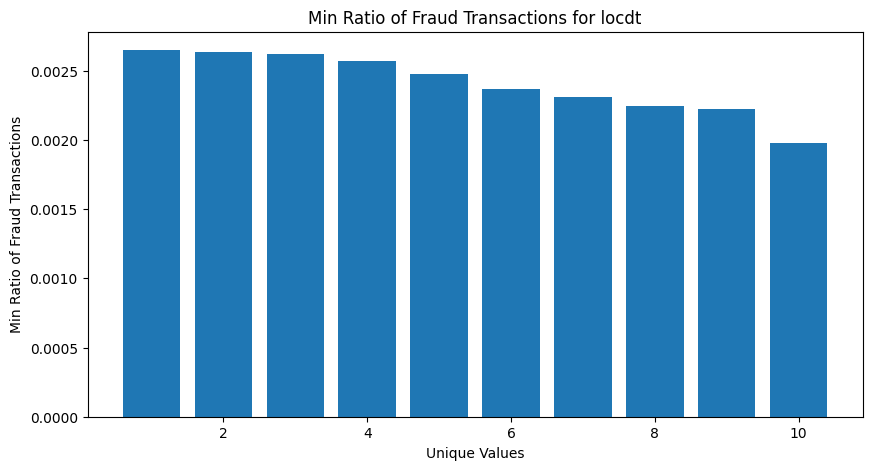



col: loctm
max ratio top 10: [0.5, 0.42857142857142855, 0.4, 0.4, 0.35, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


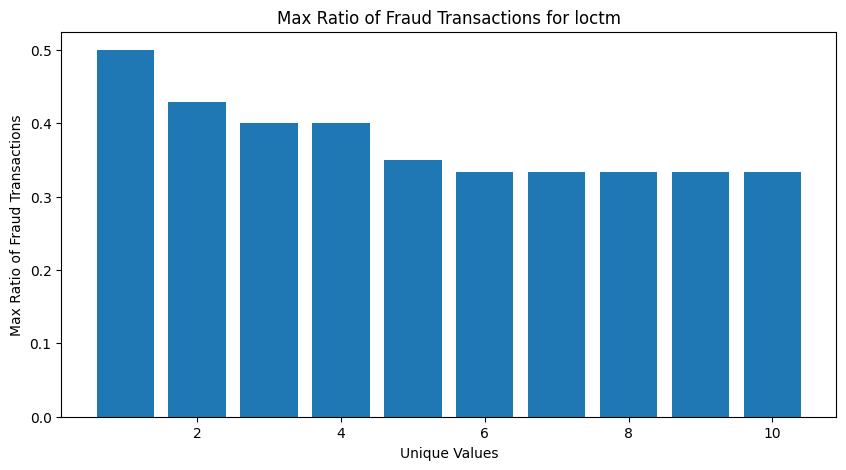

min ratio top 10: [0.0038910505836575876, 0.0038910505836575876, 0.003875968992248062, 0.0038314176245210726, 0.003787878787878788, 0.003787878787878788, 0.0037735849056603774, 0.003745318352059925, 0.0035842293906810036, 0.003484320557491289]


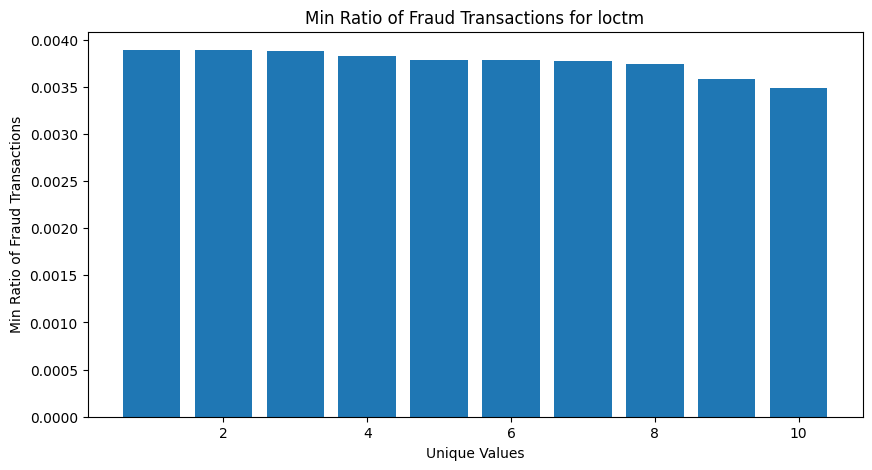



col: chid
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


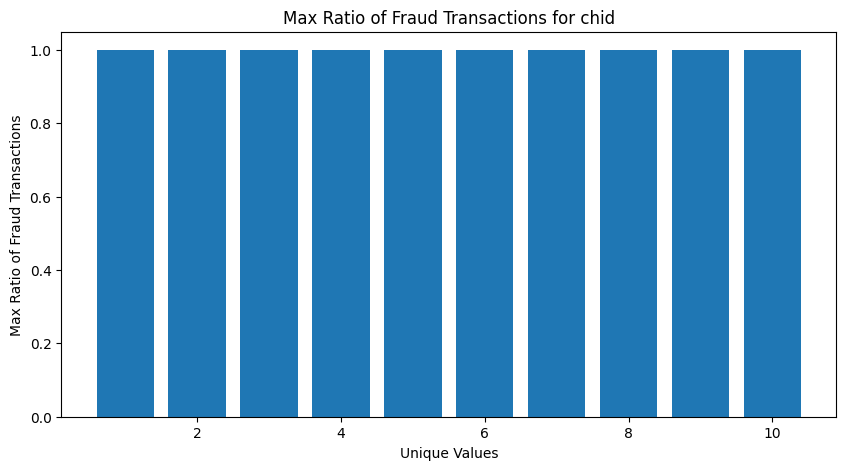

min ratio top 10: [0.005376344086021506, 0.005376344086021506, 0.005, 0.0049261083743842365, 0.004901960784313725, 0.004484304932735426, 0.004219409282700422, 0.003236245954692557, 0.0029498525073746312, 0.0009397514879398559]


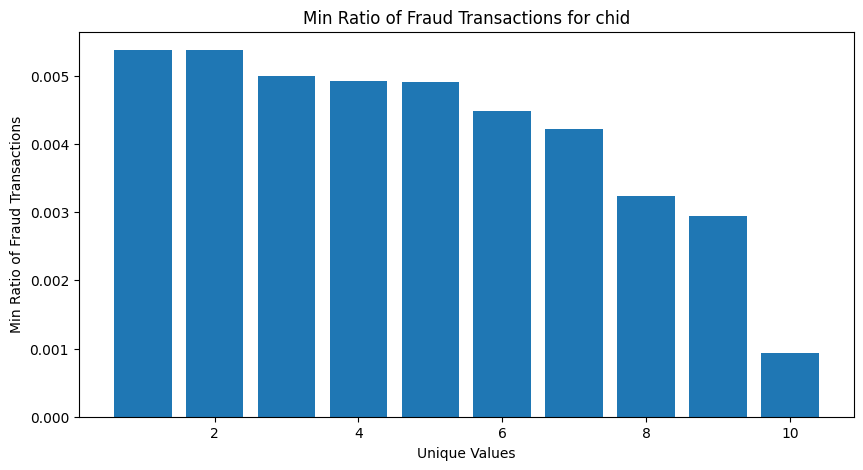



col: cano
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


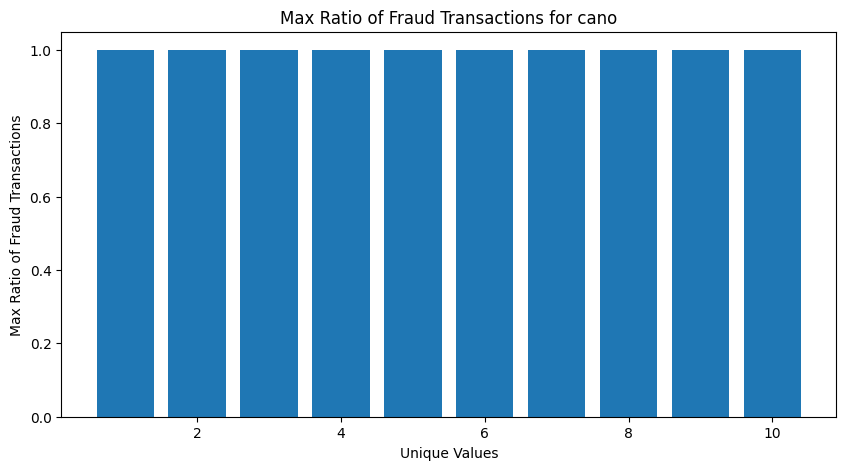

min ratio top 10: [0.006134969325153374, 0.006060606060606061, 0.005649717514124294, 0.005555555555555556, 0.005376344086021506, 0.005, 0.004484304932735426, 0.004347826086956522, 0.003257328990228013, 0.002268716914544996]


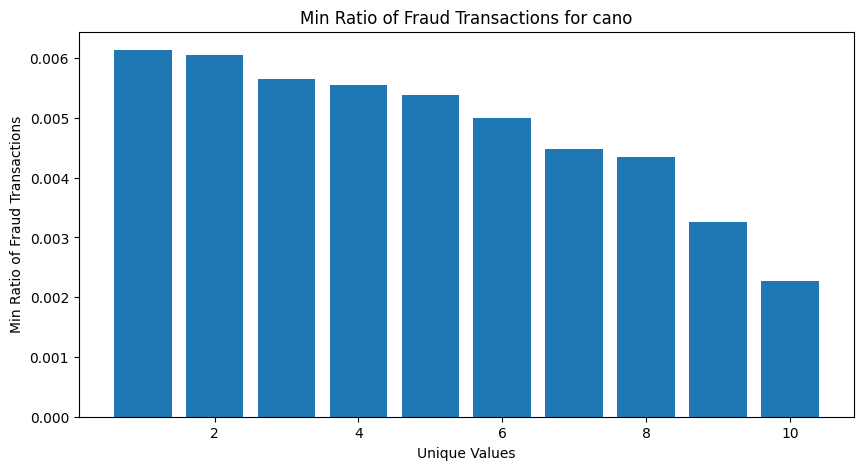



col: contp
max ratio: [0.0077466555467409805, 0.0036415785082060783, 0.0010056989607777405, 0.00022077221213756562, 3.743415599347576e-05]


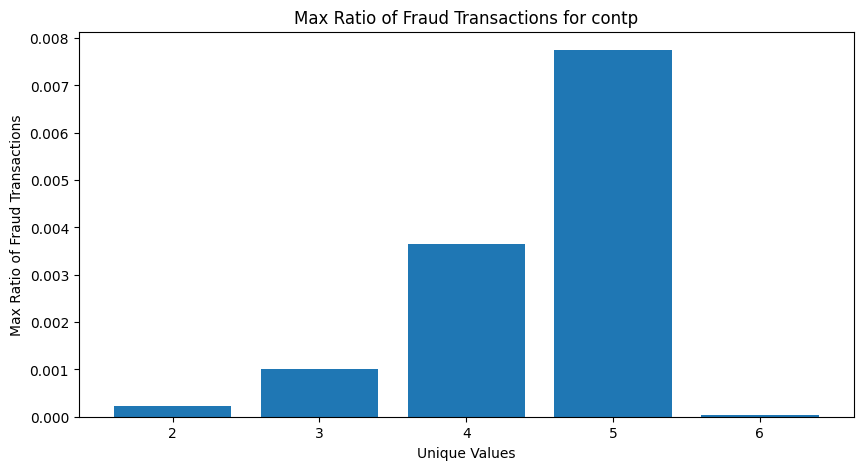



col: etymd
max ratio: [0.06349206349206349, 0.011764705882352941, 0.006080942576392977, 0.005591503727669152, 0.005307108689367783, 0.004799880500226701, 0.00034897151704308077, 0.0002999645273556206, 0.0002766924753958372, 0.0002689437235258522]


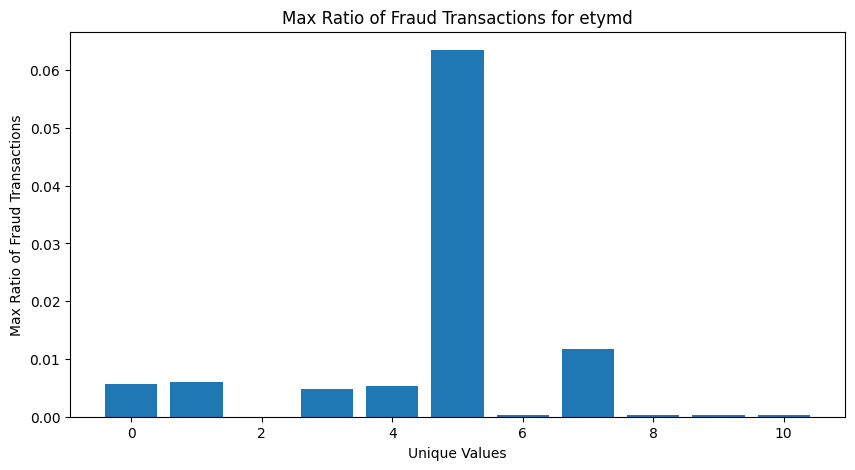



col: mchno
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


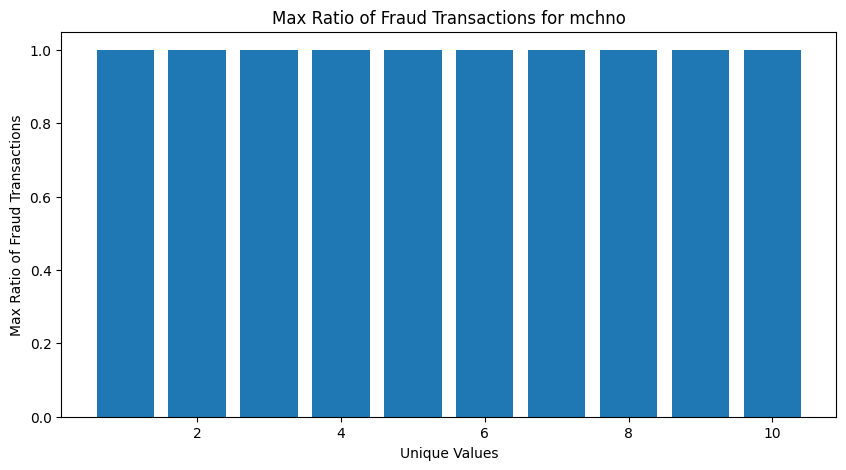

min ratio top 10: [6.696129637069774e-05, 5.692815666628714e-05, 4.328379743182802e-05, 3.079102133817779e-05, 2.2673680391801197e-05, 2.1575438520787936e-05, 1.9559519618198177e-05, 1.5470416695673696e-05, 1.510631066127875e-05, 1.2631366208569118e-05]


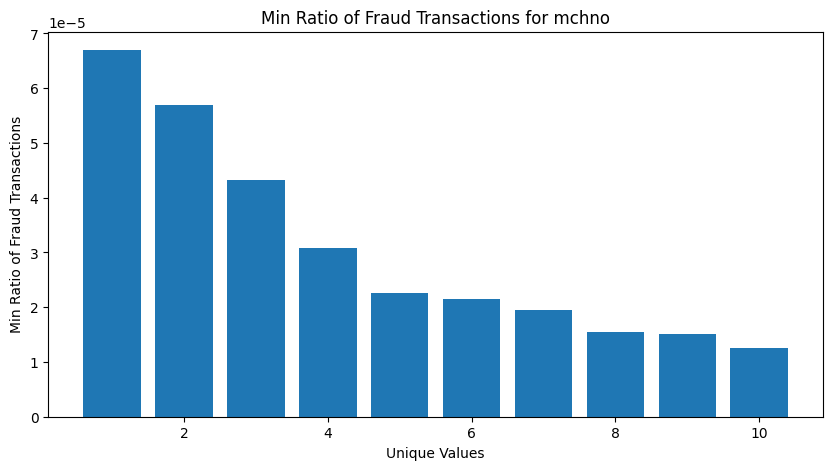



col: acqic
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


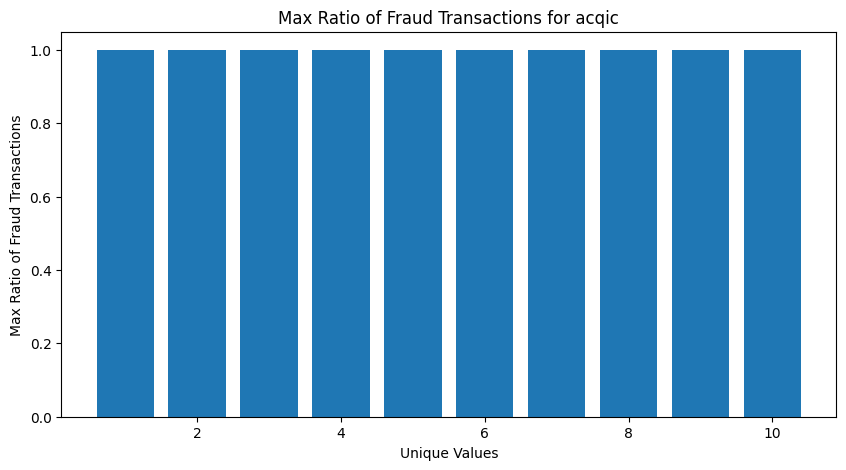

min ratio top 10: [0.00017995968902965735, 0.0001708519585213286, 0.00016650443157948666, 0.00016612675471384668, 0.0001498200530884101, 0.00014481079564481532, 0.00013498616391819838, 6.056568348373811e-05, 5.6894148436833274e-05, 3.823506920547526e-05]


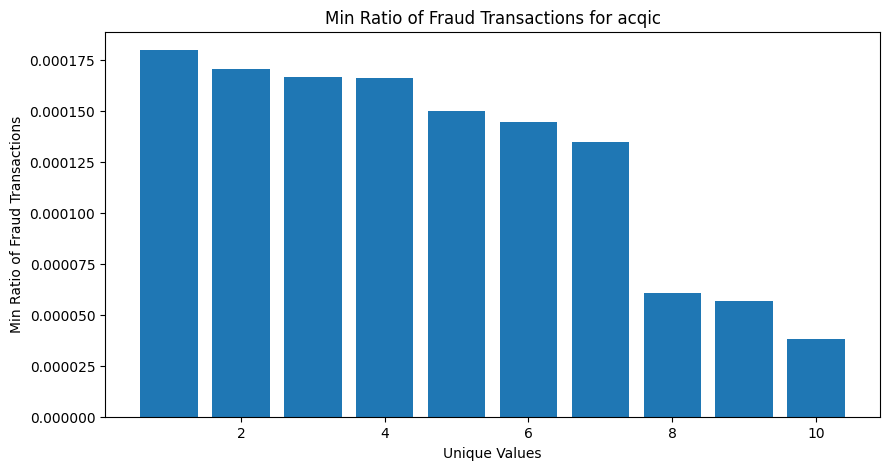



col: mcc
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9655172413793104]


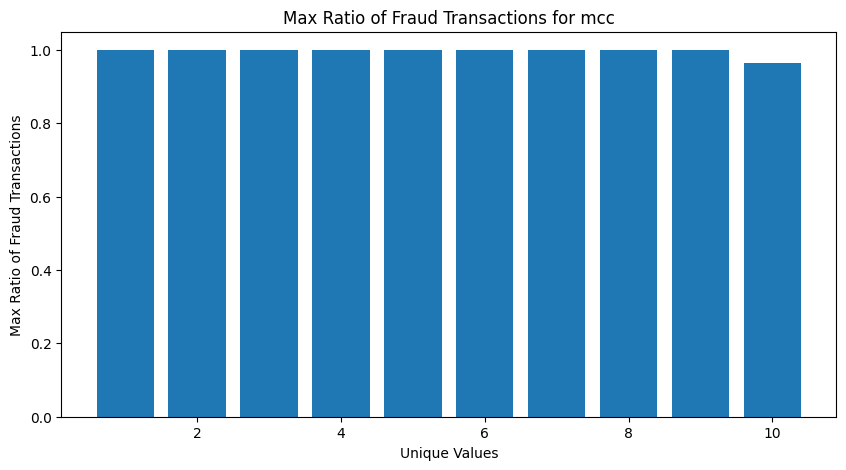

min ratio top 10: [0.00018138944313440957, 0.00017175309966148866, 0.00013183915622940013, 9.980174518186846e-05, 9.695559433779329e-05, 8.171191263554564e-05, 8.009932316071929e-05, 4.170946231289396e-05, 2.0255626000121533e-05, 9.163802978235968e-06]


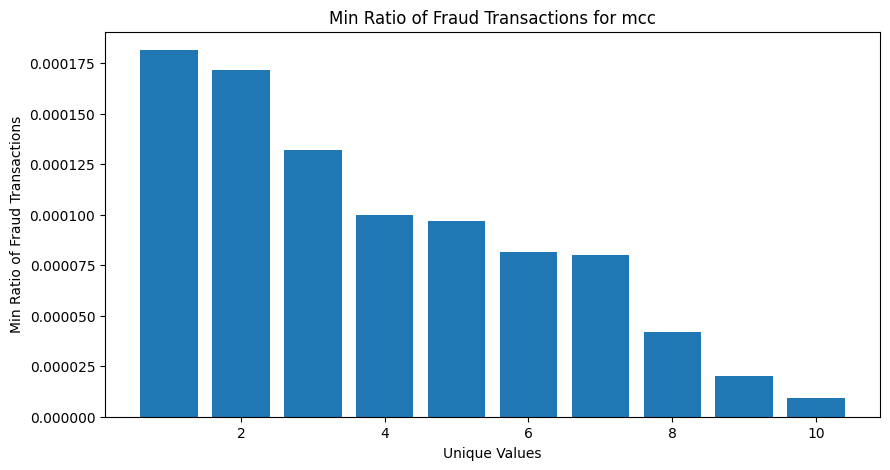



col: conam
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


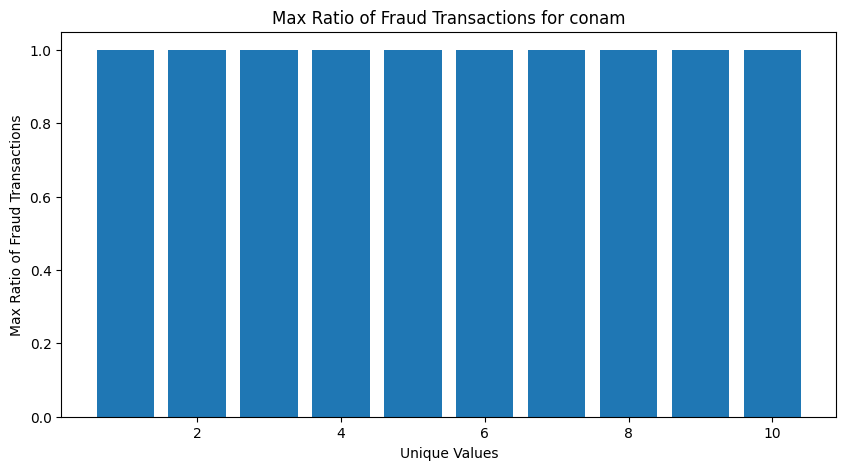

min ratio top 10: [0.0001042535446205171, 0.00010092854259184497, 9.855615236781156e-05, 9.430848304805017e-05, 9.410878976096367e-05, 9.102494083378845e-05, 9.072763563781528e-05, 8.73400585178392e-05, 5.795253687230158e-05, 5.4773511529824174e-05]


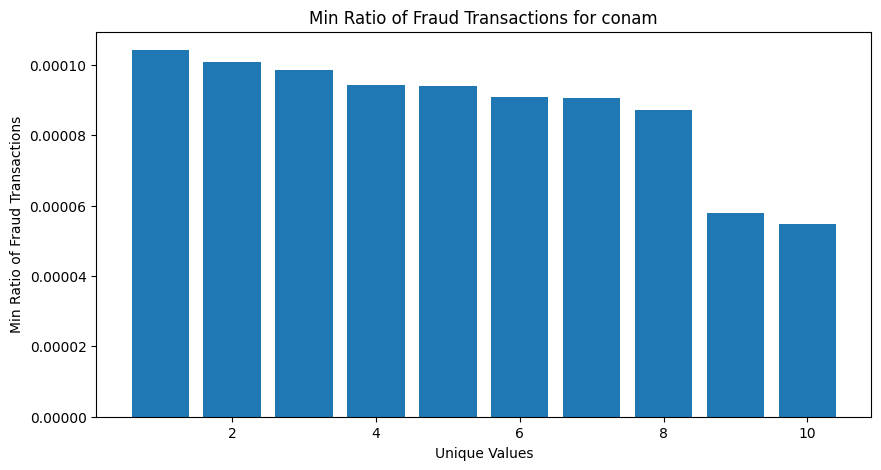



col: ecfg
max ratio: [0.005600335794782061, 0.0011285825841717704]


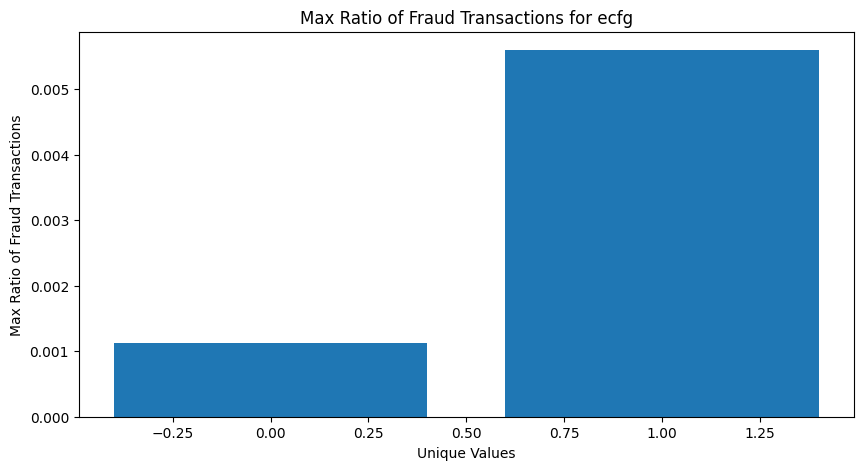



col: insfg
max ratio: [0.0037241710157011935, 0.00015220369202670087]


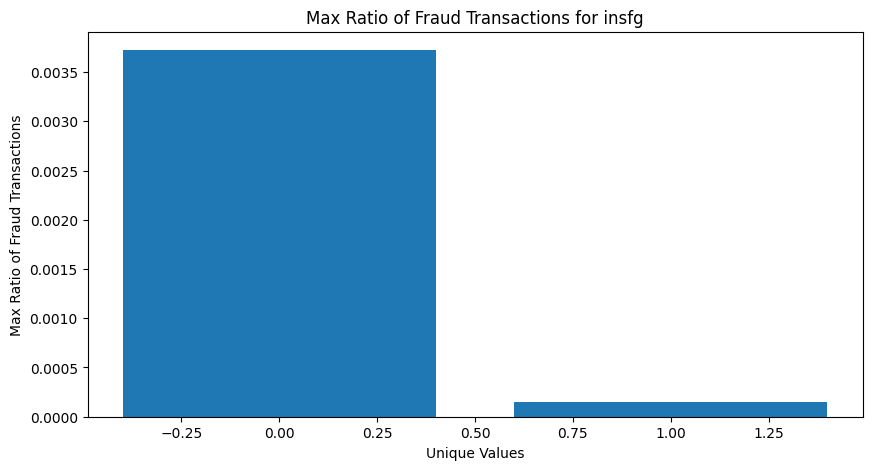



col: iterm
max ratio: [0.003724160185301834, 0.0014634146341463415, 0.000592680397095866, 0.00013262951271917028, 4.783430197794839e-05]


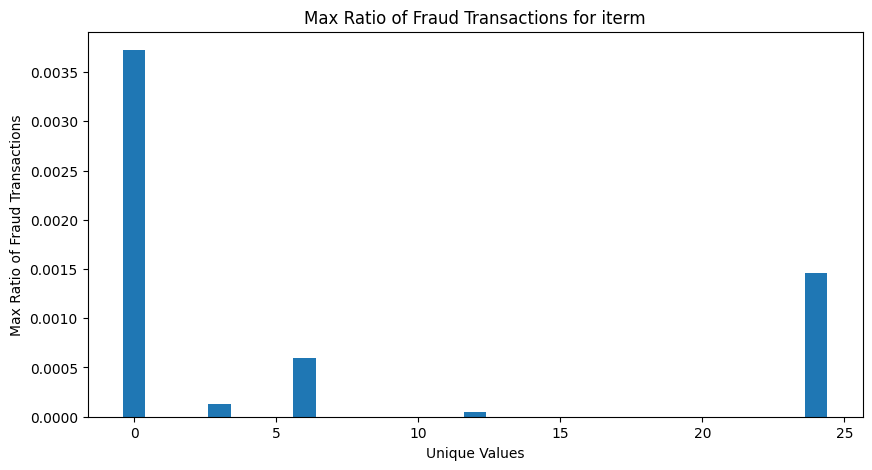



col: bnsfg
max ratio: [0.0036909384165980216, 9.043226623259179e-05]


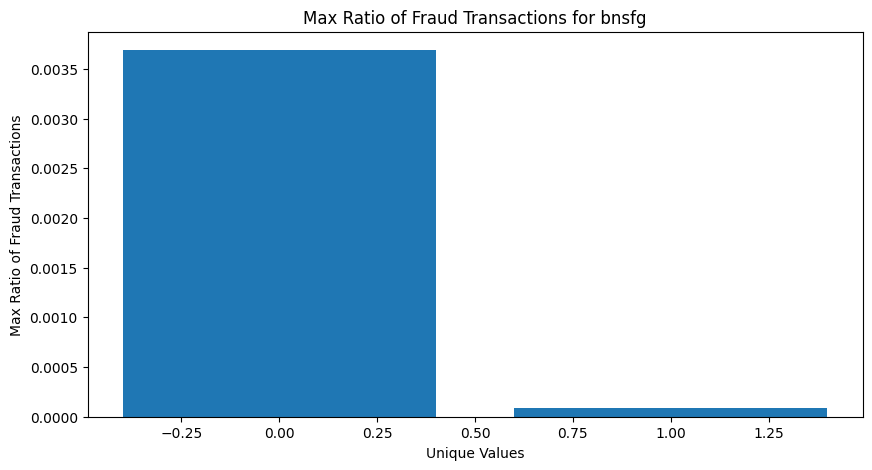



col: flam1
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


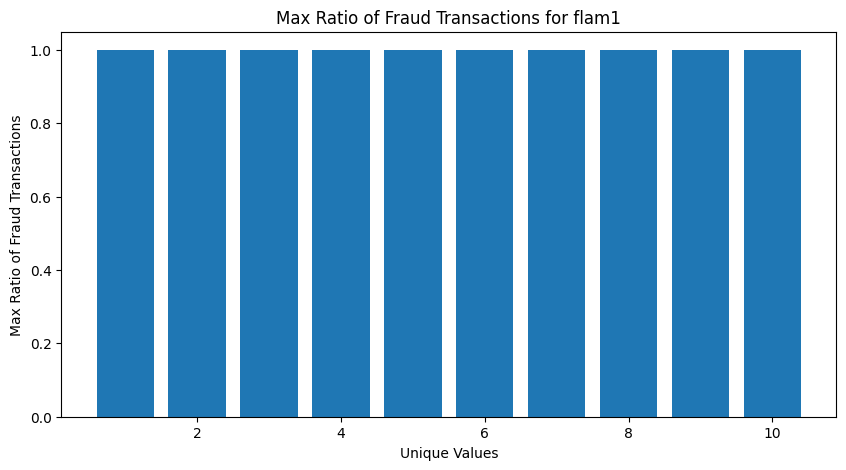

min ratio top 10: [0.00013036676516600034, 0.00012802130274477673, 0.00012637432073802604, 0.00012295585884667404, 0.00011174432897530451, 0.00011103708638685321, 9.052231375033946e-05, 8.730574471800244e-05, 8.699056152407464e-05, 5.781015146259683e-05]


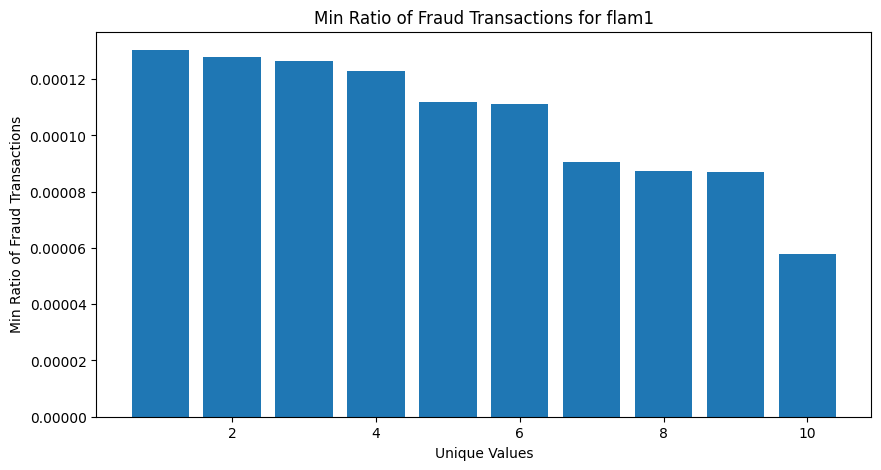



col: stocn
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 0.8367346938775511, 0.8333333333333334, 0.75, 0.6666666666666666, 0.6476868327402135, 0.5454545454545454]


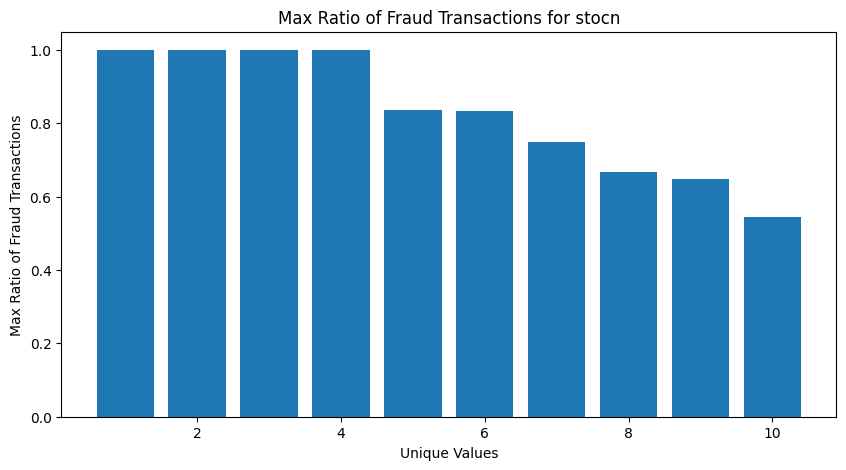

min ratio top 10: [0.01225114854517611, 0.01177584670231729, 0.008547008547008548, 0.008247422680412371, 0.007989347536617843, 0.007692307692307693, 0.005865102639296188, 0.005672609400324149, 0.004167844023735518, 0.0003212829857983978]


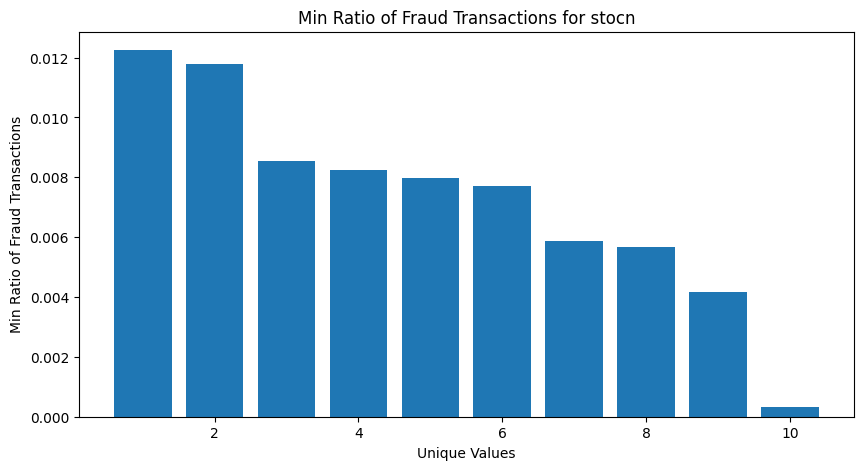



col: scity
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


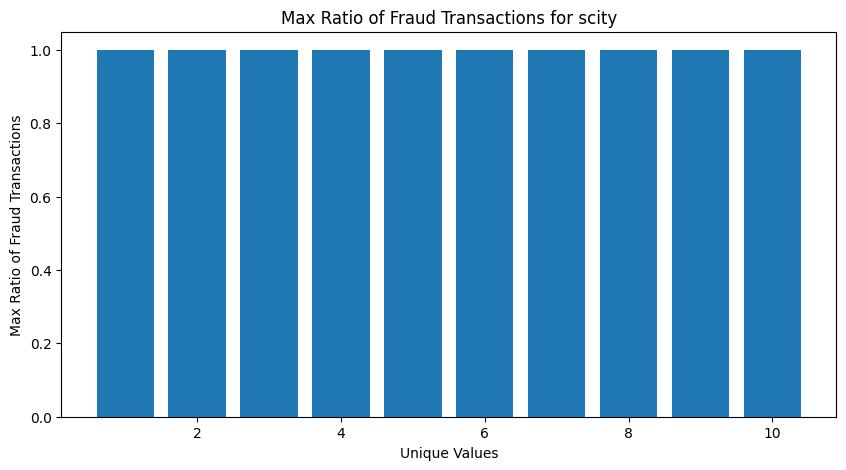

min ratio top 10: [0.0001303780964797914, 0.00012228427016671423, 0.00011098163253981466, 0.00010205429288381419, 9.706853038245001e-05, 8.382932349735938e-05, 7.795042353063451e-05, 7.4510096118024e-05, 6.023007890140336e-05, 5.213764337851929e-05]


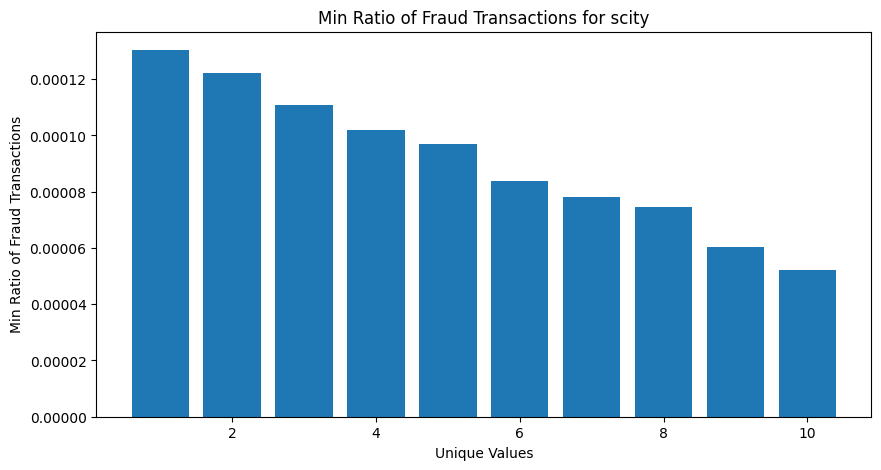



col: stscd
max ratio: [0.46575832030377484, 0.06633291614518148, 0.002486960766607099]


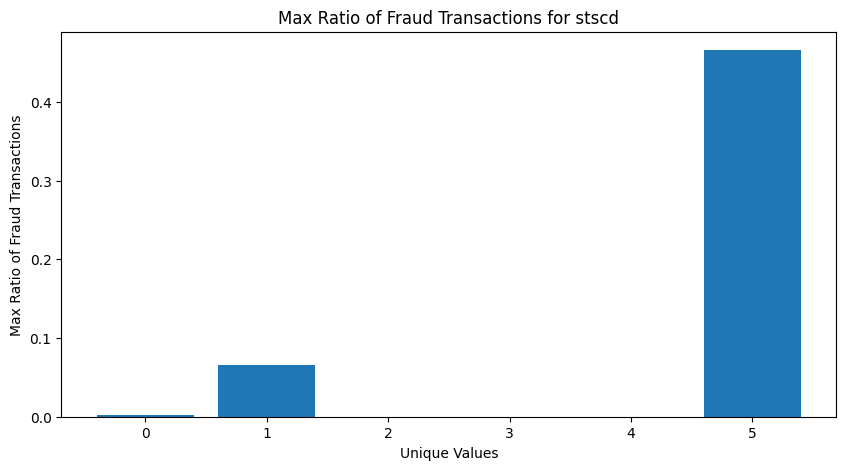



col: ovrlt
max ratio: [0.013515748682687082, 0.0035896578800922933]


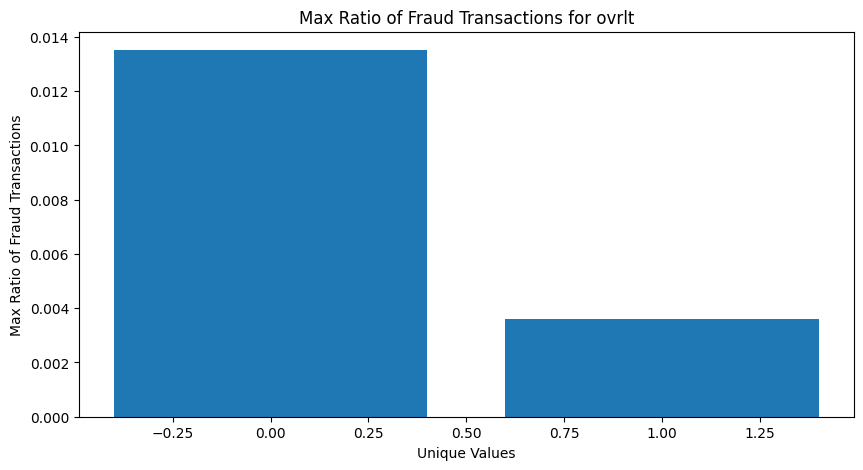



col: flbmk
max ratio: [0.003686677752105172, 0.0026345502446368085]


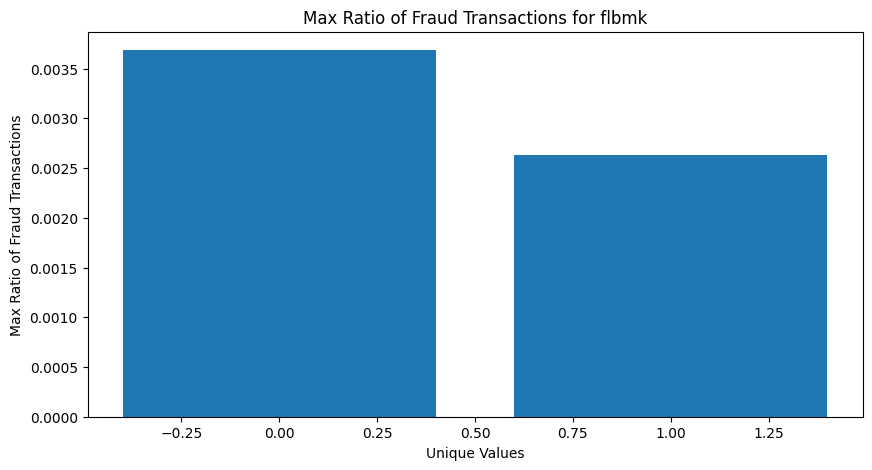



col: hcefg
max ratio: [1.0, 0.29559748427672955, 0.004151943655939356, 0.0026575624139201955, 0.0017553793884484711, 0.0015708848615196467, 0.0006104878321053806, 8.41798080700376e-05, 3.786833720131349e-05]


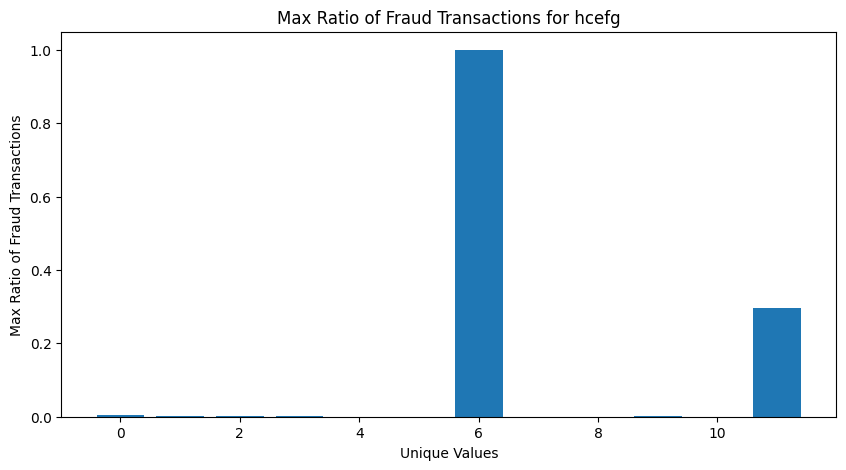



col: csmcu
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.4418604651162791, 0.4375, 0.42857142857142855, 0.3087248322147651]


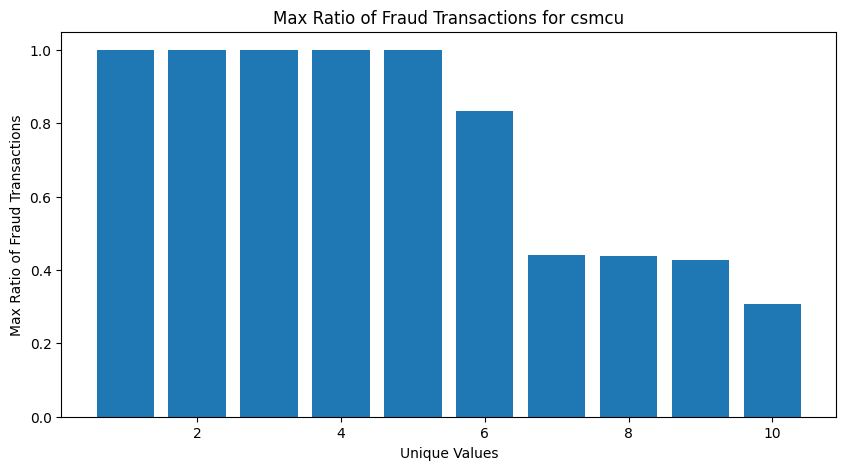

min ratio top 10: [0.00804847169470067, 0.007633587786259542, 0.007450050795800881, 0.006544953496383052, 0.005952380952380952, 0.003194888178913738, 0.00298804780876494, 0.0024137323161676025, 0.0016722408026755853, 0.0007760845631365849]


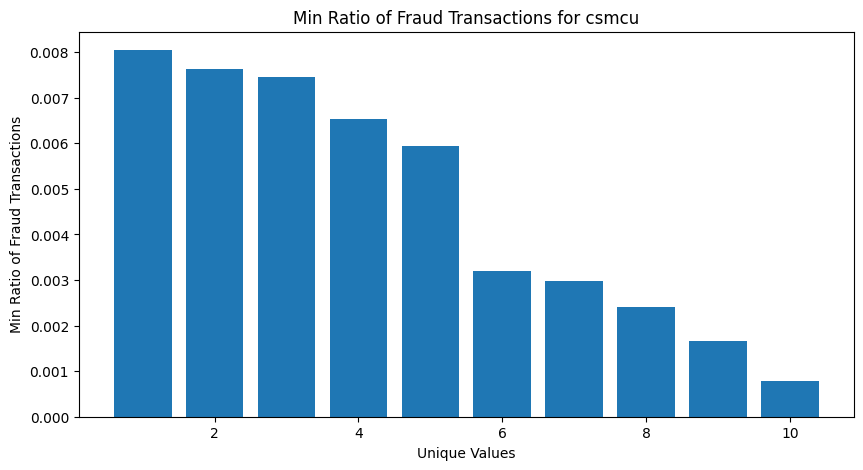



col: csmam
max ratio top 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


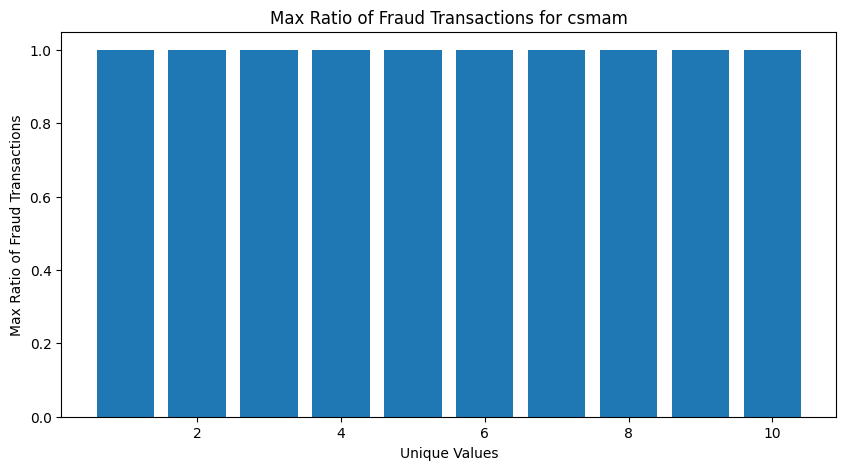

min ratio top 10: [0.000246669955599408, 0.00023665838362323986, 0.0002300966405890474, 0.0002284669865204478, 0.000214638334406525, 0.00020454080589077522, 0.00017143836790673754, 0.0001559332605644784, 0.00014803849000740192, 0.00012631047113805733]


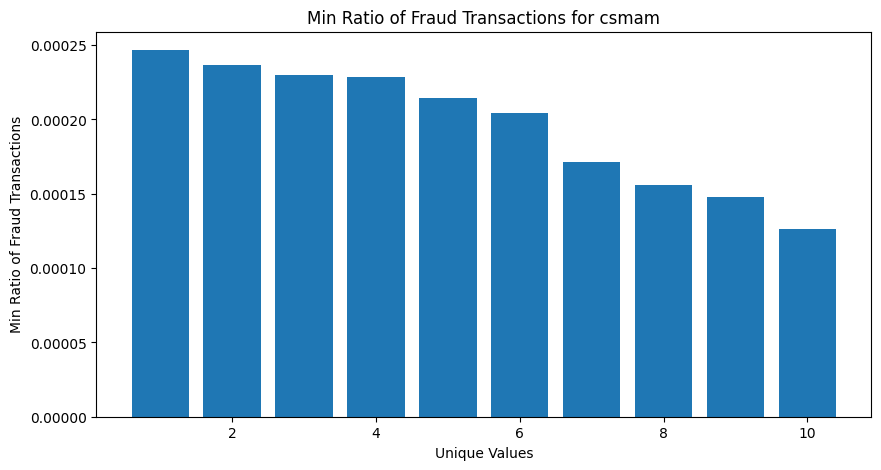



col: flg_3dsmk
max ratio: [0.003925844323914872, 0.0011184701379266613]


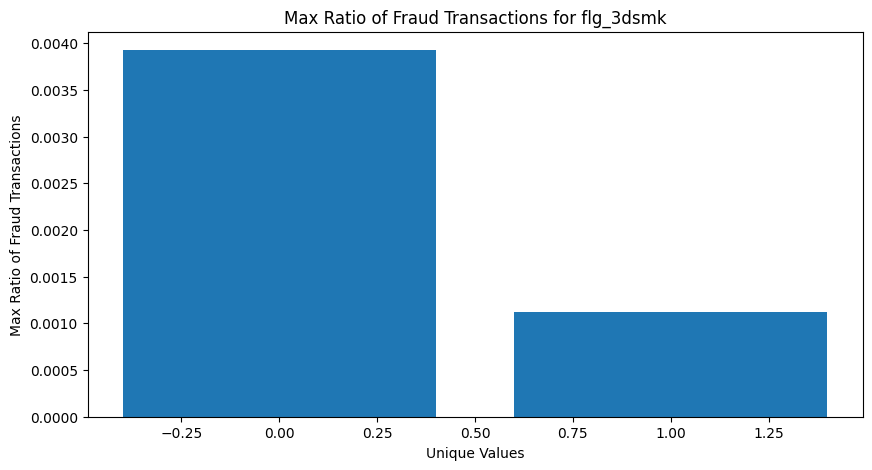



col: label
max ratio: [1.0]


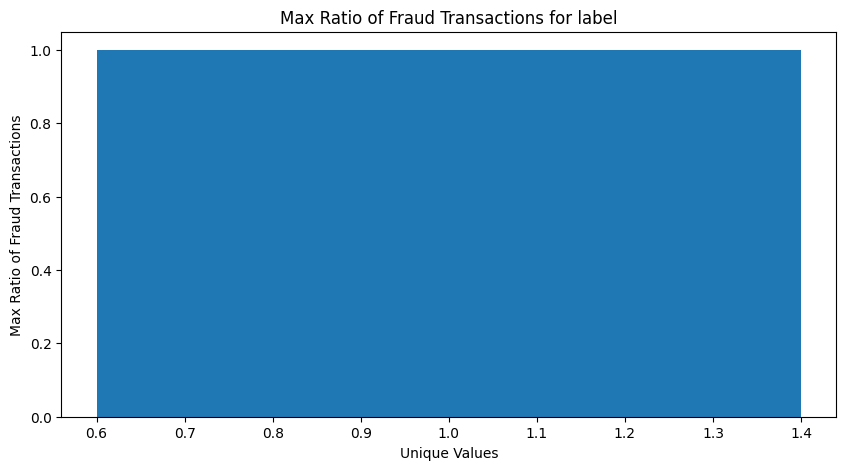

In [18]:
# print(fraud_df[col].shape[0]/ training_df[col].shape[0])
# print(non_fraud_df[col].shape[0]/ training_df[col].shape[0])
for col in training_df.columns:  
    print(f"col: {col}")
    # print(f"nunique: {training_df[col].nunique()}")
    # print(f"unique values: {training_df[col].unique()}")
    # print(f"fraud nunique: {fraud_df[col].nunique()}")
    # print(f"fraud unique values: {fraud_df[col].unique()}")
    # print(f"non fraud nunique: {non_fraud_df[col].nunique()}")
    # print(f"non fraud unique values: {non_fraud_df[col].unique()}")
    # print(fraud_df[col].nunique()/ training_df[col].nunique())
    # print(non_fraud_df[col].nunique()/ training_df[col].nunique()) 
    unique_values = fraud_df[col].unique()
    # print(f"unique values: {unique_values}")

    #average_ratio
    # average_ratio = 0
    # for value in unique_values:
    #     average_ratio += fraud_df[col][fraud_df[col] == value].shape[0]/ training_df[col][training_df[col] == value].shape[0]
    # average_ratio /= len(unique_values)
    # print(f"average_ratio: {average_ratio}")

    #real_ratio
    # unique_values = fraud_df[col].unique()
    # numerator = np.sum(np.isin(fraud_df[col], unique_values))
    # denominator = np.sum(np.isin(training_df[col], unique_values))
    # average_ratio = numerator/denominator
    # print(f"real_ratio: {average_ratio}")

    #max and min ratio top 10 and plot
    unique_values = fraud_df[col].unique()
    ratio_list = []
    for value in unique_values:
        ratio = fraud_df[col][fraud_df[col] == value].shape[0]/ training_df[col][training_df[col] == value].shape[0]
        ratio_list.append(ratio)
    ratio_list.sort(reverse=True)
    if len(ratio_list) > 10:
        print(f"max ratio top 10: {ratio_list[:10]}")
        plt.figure(figsize=(10, 5))
        plt.bar(np.arange(1, 11), ratio_list[:10])
        plt.title(f"Max Ratio of Fraud Transactions for {col}")
        plt.xlabel("Unique Values")
        plt.ylabel("Max Ratio of Fraud Transactions")
        plt.show()
        print(f"min ratio top 10: {ratio_list[-10:]}")
        plt.figure(figsize=(10, 5))
        plt.bar(np.arange(1, 11), ratio_list[-10:])
        plt.title(f"Min Ratio of Fraud Transactions for {col}")
        plt.xlabel("Unique Values")
        plt.ylabel("Min Ratio of Fraud Transactions")
        plt.show()
    else:
        print(f"max ratio: {ratio_list}")
        plt.figure(figsize=(10, 5))
        plt.bar(unique_values, ratio_list)
        plt.title(f"Max Ratio of Fraud Transactions for {col}")
        plt.xlabel("Unique Values")
        plt.ylabel("Max Ratio of Fraud Transactions")
        plt.show()
    print('\n')


Average ratio:  all unique value in fraud_df and average (amount in fraud_df / amount in training_df) for each feature(column)   
col: label      

---
col: cano       
col: chid       
col: scity      
col: mchno      
col: conam      

---
col: acqic      
col: stocn      
col: csmcu       
col: stscd      
col: flam1      
col: hcefg      
col: mcc        

---
col: csmam      
col: loctm      

---
col: locdt      
col: contp      
col: etymd      
col: ecfg       
col: insfg     
col: iterm      
col: bnsfg     
col: ovrlt   
col: flbmk   
col: flg_3dsmk 

In [13]:
y = training_df['label']
X = training_df.drop(['label','txkey'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

training & testing.

In [31]:



# df_sample = df.sample(n=300000, random_state=42)
# train_df, val_df = train_test_split(df_sample, test_size=0.2, random_state=42)

# # Define the features and target variable
# #featues 前面preprocess先做好這邊在註解掉
# features = [ 'locdt','loctm','contp','etymd','mcc','conam','ecfg','insfg','iterm','bnsfg','flam1','stocn','scity','ovrlt','flbmk','hcefg','csmcu','csmam','flg_3dsmk'] 
# target = 'label'

# # Split the training and validation datasets into features and target variable
# X_train = train_df[features]
# y_train = train_df[target]
# X_val = val_df[features]
# y_val = val_df[target]

# # Train the model using LightGBM

# # params = {
# #     'objective': 'binary',
# #     'metric': 'binary_logloss',
# #     'boosting_type': 'dart',
# #     'num_leaves': 50,  
# #     'learning_rate': 0.01,  
# #     'feature_fraction': 0.8  
# # }
# params = {'objective': 'binary',
#           'boosting_type': 'gbdt',
#           'metric': 'auc',
#           'learning_rate': 0.007,
#           'num_leaves': 2**8,
#           'max_depth': -1,
#           'tree_learner':'serial',
#           'colsample_bytree': 0.5,
#           'subsample_freq':1,
#           'subsample':0.7,
#           'n_estimators':10000,
#           'min_data_in_leaf': 106,
#           'max_bin':255,
#           'verbosity': -1,
#           'early_stopping_rounds':100,
#          }


# train_data = lgb.Dataset(X_train, label=y_train)
# val_data = lgb.Dataset(X_val, label=y_val)

# model = lgb.train(params, train_data, num_boost_round=10000, valid_sets=[train_data, val_data])
# model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, val_data], early_stopping_rounds=50)

categories = ['chid', 'cano', 'contp', 'etymd', 'mchno', 'acqic',
              'mcc',  'ecfg', 'insfg',  'bnsfg', 'stocn', 'scity',
              'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'flg_3dsmk']

params = {
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.005,
    'n_estimators': 3000,
    'boosting_type': 'gbdt',
    'categorical_feature': categories,
}   

train_data = lgb.Dataset(X_train, label=y_train,
                         categorical_feature=categories)
test_data = lgb.Dataset(X_test, label=y_test,
                        reference=train_data)

bst = lgb.train(params, train_data,  valid_sets=[test_data])

c:\Users\lo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\lo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1873: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
c:\Users\lo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\basic.py:1893: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=chid,cano,contp,etymd,mchno,acqic,mcc,ecfg,insfg,bnsfg,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,flg_3dsmk, categorical_column=2,3,4,5,6,7,8,10,11,13,15,16,17,18,19,20,21,23 will be ignored. Current value: categorical_feature=chid,cano,contp,etymd,mchno,acqic,mcc,ecfg,insfg,bnsfg,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,flg_3dsmk
[LightGBM] [Info] Number of positive: 25694, number of negative: 6925126
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 39625
[LightGBM] [Info] Number of data points in the train set: 6950820, number of used features: 24


LightGBMError: bin size 15964 cannot run on GPU

validation.

In [46]:
# y_pred_prob = model.predict(X_val)
# y_pred = [1 if x >= 0.5 else 0 for x in y_pred_prob]  # Assuming binary classification, adjust as needed
# # y_pred = model.predict(X_val)
# # print(y_pred)
# # # Get the true labels from the validation set
# # y_true = val_data.label

# # # Calculate F1 score
# f1 = f1_score(y_val, y_pred)
# print(f'F1 Score on Validation Set: {f1}')

# y_pred = pd.Series(bst.predict(X_test, num_iteration=bst.best_iteration)>0.5).astype(int)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

F1 Score on Validation Set: 0.0


predict.

In [22]:
# display(training_df.head())
# display(X_test.head())
# display(test_df.head())
predict_data = test_df.drop(['txkey'], axis=1)
y_pred = pd.Series(bst.predict(predict_data, num_iteration=bst.best_iteration)>0.5).astype(int)
# pridict = pd.DataFrame(test_df['txkey'] )
# pridict['pred'] = y_pred # put here
# display(pridict)

In [28]:
# test_df = pd.read_csv(test_file_path)
pridict = pd.DataFrame(test_df['txkey'] )
pridict['pred'] = y_pred 
# display(y_pred )
# print(np.nonzero(y_pred))
# print(y_pred[1771])
# display(pridict.iloc[1900])
display(pridict)

,txkey,pred
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,0
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,0
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,0
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,0
...,...,...
600177,741a391b2c2114491d1d18acb1a892341b9280e1e3529f...,0
600178,76f613595631fb35938bf10f5b7abe3f60a3d34ccf5f44...,0
600179,c32e846a4469e4869e2df8f8e160fba4e829b6beebb44d...,0
600180,d641cd25a830de759cd55b4a643d71eadb770bc917aed3...,0


output.

In [29]:
pridict.to_csv('..\\output.csv', index=False)